In [9]:
import pickle 
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils
from keras.utils import to_categorical

In [2]:
pickle_in_features = open('/research/Projects/Potato plant disease/features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('/research/Projects/Potato plant disease/labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
# y = to_categorical(y)

In [3]:
print(len(x))
print(len(y))

3008
3008


In [4]:
print(x.shape)

(3008, 224, 224, 3)


### Defining the Train, Test and Validation sets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)


In [7]:
print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105,)


### Loading the VGG 16 model

In [15]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')


last_layer = model.get_layer('fc2').output
X = last_layer
d1 = Dropout(0.3, name='dropout_layer_1')(X)
out = Dense(classes, activation='softmax', name='output')(d1)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [16]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))



Epoch 1/15
53/53 - 241s - loss: 1.1993 - accuracy: 0.5428 - val_loss: 1.2250 - val_accuracy: 0.4632
Epoch 2/15
53/53 - 236s - loss: 0.7387 - accuracy: 0.6787 - val_loss: 0.9808 - val_accuracy: 0.6770
Epoch 3/15
53/53 - 237s - loss: 0.5820 - accuracy: 0.7625 - val_loss: 0.3635 - val_accuracy: 0.8432
Epoch 4/15
53/53 - 246s - loss: 0.4796 - accuracy: 0.8094 - val_loss: 0.4040 - val_accuracy: 0.8100
Epoch 5/15
53/53 - 236s - loss: 0.4150 - accuracy: 0.8331 - val_loss: 0.2487 - val_accuracy: 0.8979
Epoch 6/15
53/53 - 248s - loss: 0.3786 - accuracy: 0.8515 - val_loss: 0.2913 - val_accuracy: 0.8646
Epoch 7/15
53/53 - 238s - loss: 0.3583 - accuracy: 0.8539 - val_loss: 0.1977 - val_accuracy: 0.9264
Epoch 8/15
53/53 - 235s - loss: 0.2921 - accuracy: 0.8800 - val_loss: 0.7164 - val_accuracy: 0.7078
Epoch 9/15
53/53 - 271s - loss: 0.3097 - accuracy: 0.8676 - val_loss: 0.1838 - val_accuracy: 0.9311
Epoch 10/15
53/53 - 254s - loss: 0.2999 - accuracy: 0.8789 - val_loss: 0.1597 - val_accuracy: 0.9572

In [17]:
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 119s - loss: 0.1825 - accuracy: 0.9269
[INFO] loss=0.1825, accuracy: 92.6910%


### Plotting the graphs

In [30]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


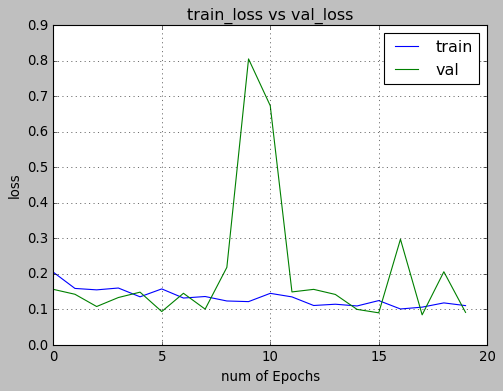

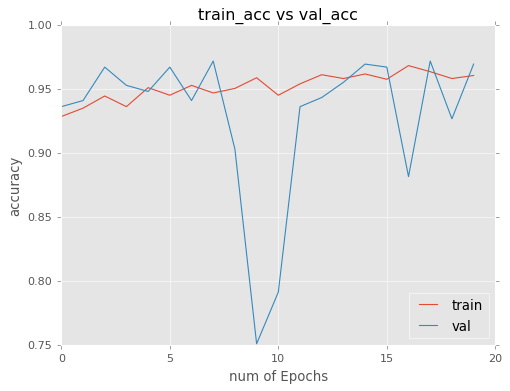

In [36]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])